### _Importando as bibliotecas_

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import requests
import plotly.graph_objects as go

### _Baixando os dados_

In [31]:
# Definindo os parâmetros
ticker = 'BTC-USD'
start_data = '2018-01-01'
end_date = '2025-10-25'

# Fazendo o download dos dados
df = yf.download(ticker, start = start_data, end = end_date )

C:\Users\dione\AppData\Local\Temp\ipykernel_12824\4204814104.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


### _Exibindo os primeiros dados e ajustando as colunas_

In [32]:
# Exibindo as 5 primeiras linhas
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [33]:
# Passo 1: redefinir as colunas usando apenas o segundo nível (Close, High, Low, etc.)
df.columns = df.columns.get_level_values(0)

# Passo 2: resetar o índice de datas, se desejar que Date vire coluna normal
df = df.reset_index(level='Date')

df['Ticker'] = ticker

In [34]:
# Exibindo as 5 primeiras linhas
df.head()

Price,Date,Close,High,Low,Open,Volume,Ticker
0,2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000,BTC-USD
1,2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192,BTC-USD
2,2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160,BTC-USD
3,2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744,BTC-USD
4,2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072,BTC-USD


In [35]:
# Definindo a ordem das colunas
ordenacao_colunas = ['Date', 'Ticker', 'Open', 'Close', 'Low', 'High', 'Volume']
novos_nomes = ['Data', 'Ticker', 'Abertura', 'Fechamento', 'Mínima', 'Máxima', 'Volume']

# Definindo as colunas no DataFrame
df = df[ordenacao_colunas]


df = df[ordenacao_colunas]

df.columns = novos_nomes

df.head()

,Data,Ticker,Abertura,Fechamento,Mínima,Máxima,Volume
0,2018-01-01,BTC-USD,14112.200195,13657.200195,13154.700195,14112.200195,10291200000
1,2018-01-02,BTC-USD,13625.000000,14982.099609,13163.599609,15444.599609,16846600192
2,2018-01-03,BTC-USD,14978.200195,15201.000000,14844.500000,15572.799805,16871900160
3,2018-01-04,BTC-USD,15270.700195,15599.200195,14522.200195,15739.700195,21783199744
4,2018-01-05,BTC-USD,15477.200195,17429.500000,15202.799805,17705.199219,23840899072


### _Gerando o primeiro gráfico_

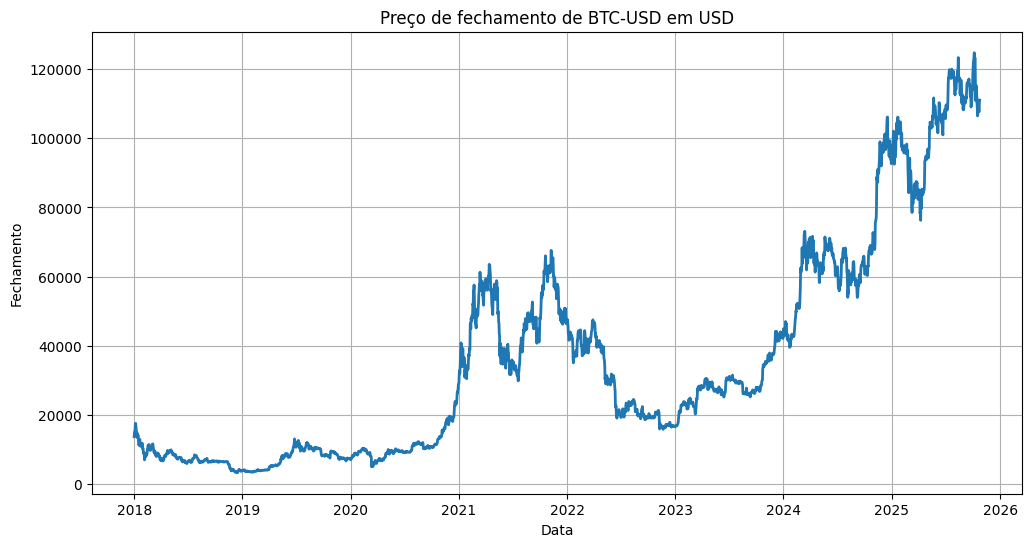

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Data'], y=df['Fechamento'], linewidth=2)
plt.title(f'Preço de fechamento de {ticker} em USD')
plt.grid()
plt.show()

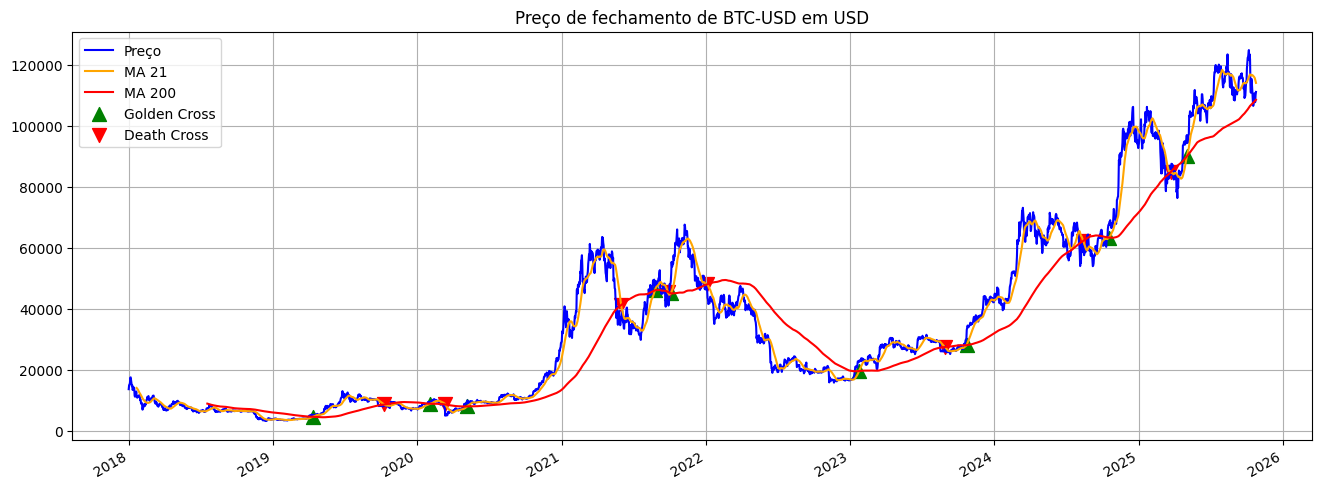

In [38]:
# Garantir que a coluna Data seja datetime
df['Data'] = pd.to_datetime(df['Data'])

# Criando as Médias Móveis
df['MA_21'] = df['Fechamento'].rolling(window=21).mean()
df['MA_50'] = df['Fechamento'].rolling(window=50).mean()  # caso queira usar futuramente
df['MA_200'] = df['Fechamento'].rolling(window=200).mean()

# Listas para armazenar coordenadas exatas
golden_x, golden_y = [], []
death_x, death_y = [], []

# Loop único para identificar Golden Cross e Death Cross
for i in range(1, len(df)):
    prev21, prev200 = df['MA_21'].iloc[i-1], df['MA_200'].iloc[i-1]
    curr21, curr200 = df['MA_21'].iloc[i], df['MA_200'].iloc[i]

    # Verifica cruzamento
    if (curr21 > curr200 and prev21 <= prev200) or (curr21 < curr200 and prev21 >= prev200):
        # Interpolação linear para encontrar ponto exato
        t = (prev200 - prev21) / ((curr21 - prev21) - (curr200 - prev200))
        y_cross = prev21 + t * (curr21 - prev21)
        x_cross = df['Data'].iloc[i-1] + (df['Data'].iloc[i] - df['Data'].iloc[i-1]) * t

        # Armazena conforme tipo de cruzamento
        if curr21 > curr200:
            golden_x.append(x_cross)
            golden_y.append(y_cross)
        else:
            death_x.append(x_cross)
            death_y.append(y_cross)

# --- Plotagem com Seaborn/Matplotlib ---
plt.figure(figsize=(16,6))
sns.lineplot(x=df['Data'], y=df['Fechamento'], label='Preço', color='blue', linewidth=1.5)
sns.lineplot(x=df['Data'], y=df['MA_21'], label='MA 21', color='orange', linewidth=1.5)
sns.lineplot(x=df['Data'], y=df['MA_200'], label='MA 200', color='red', linewidth=1.5)
plt.scatter(golden_x, golden_y, marker='^', color='green', s=100, label='Golden Cross')
plt.scatter(death_x, death_y, marker='v', color='red', s=100, label='Death Cross')
plt.title(f'Preço de fechamento de {ticker} em USD')
plt.grid(True)
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()
